## Cardiovascular Disease Prediction
**Benan AKCA** <a id="0"></a>

[![Digital-Heart-Health.png](https://i.postimg.cc/26p24TZ0/Digital-Heart-Health.png)](https://postimg.cc/qtLsrsQK)

* [Introduction](#1)
* [Import Modules](#2)
* [Data Cleaning and EDA](#3)
    * [Checking Duplication and Missed Values](#4)        
    * [Visualization](#5)
        * [Detecting Outliers](#6)
* [Feature Engineering](#7)
* [Model Selection](#8)
    * [Training and Test Sets](#9)
    * [Data Normalization](#10)
    * [Model Comparison](#11)
    * [K Fold Cross Validation](#12)
    * [Grid Search](#13)
* [Model Evaluation](#14)
    * [Test Set Accuracy Score](#15)
    * [Confusion Matrix](#16)
    * [F1 Score Calculation](#17)
* [ANN Aproach](#18)    
* [Conclusion](#26)

## INTRODUCTION <a id="1"></a>
<mark>[Return Contents](#0)
<hr>
We have a nice data set that includes patient characteristics and a label about cardiovascular diseases.
    
Then what we have in our kernel;
* Dropping irrevelant feature
* Handling outliers of high blood pressure 
* Adding Body Mess Index as a new feature (Feature Engineering)
* Comparison of Classification Models
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * K Nearest Neighbors (KNN)
    * Suppor Vector Machine (SVM)
    * Naive Bayes
* K Fold Cross Validation to prevent overfitting data
* Grid Search algorithm for finding the best hyperparameters for the winning classification algorithm by 
* Calculating Precision, Recall and F1 scores for measuring the success with another evaluation metric
* ANN Aproach

and **more**.

### **Import Modules** <a id="2"></a>
<mark>[Return Contents](#0)
<hr>

Importing the necessary modules.

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
import scipy.stats as stats
import sklearn
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


### **Data Cleaning and EDA** <a id="3"></a>
<mark>[Return Contents](#0)
<hr>
Firstly, let us explore what we have in our data.

In [61]:
data_raw = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv", sep=";")
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [62]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [63]:
data_raw.drop("id",axis=1,inplace=True)


### **Checking Duplication and Missing Values** <a id="4"></a>
<mark>[Return Contents](#0)
<hr>
    
Before visualization and outlier checks it is very important to handle duplicate and missing values.

In [64]:
print("There is {} duplicated values in data frame".format(data_raw.duplicated().sum()))

There is 24 duplicated values in data frame


* We can drop the duplicates because they have no any effect of training of model.
* Firstly let us see the duplicated rows with eyes.

In [65]:
duplicated = data_raw[data_raw.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(2) # Show us just 1 duplication of 24

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [66]:
data_raw.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(data_raw.duplicated().sum()))

There is 0 duplicated values in data frame


In [67]:
print("There is {} missing values in data frame".format(data_raw.isnull().sum().sum()))

There is 0 missing values in data frame


Our data is clean now.

### **Visualization** <a id="5"></a>
<mark>[Return Contents](#0)
<hr>
### Detecting Outliers <a id="6"></a>

Detecting outlier and handling them can increase our accuracy score.

In [68]:
x = data_raw.copy(deep=True)
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


* Columns of "age", "height", "weight", "ap_hi", "ap_lo" may have outlier.
* In order to compare them on same scale we need to standartize firstly.

<hr>
#### My Standart Scalar Function



In [69]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
x_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436071,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0
1,0.307635,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1
2,-0.248017,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1
3,-0.748143,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1
4,-0.808532,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0


* In order to use the multi box graph plot we need to melt out data.


In [70]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted

,cardio,features,value
0,0,age,-0.436071
1,1,age,0.307635
2,1,age,-0.248017
3,1,age,-0.748143
4,0,age,-0.808532
...,...,...,...
349875,0,ap_lo,-0.088254
349876,1,ap_lo,-0.035205
349877,1,ap_lo,-0.035205
349878,1,ap_lo,-0.088254


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

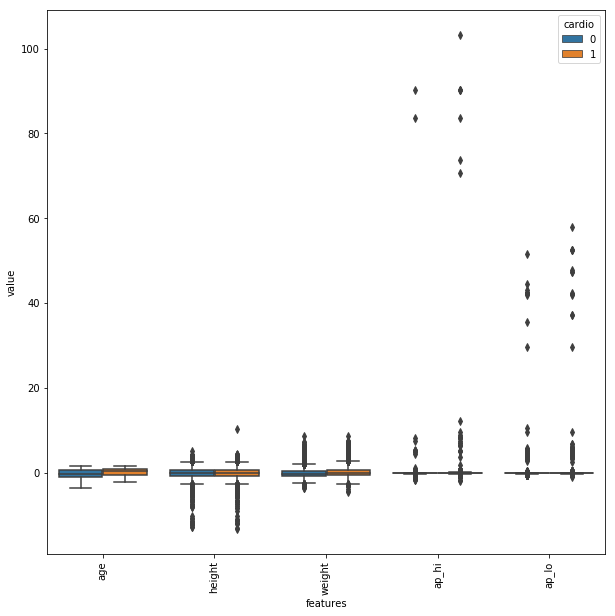

In [71]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)

* There are some outliers in the dataset, but as seen above there is an unusual outlier in ap_hi and ap_lo features.
* Let us calculate the low bound and hi bound of ap_lo and ap_hi features

In [72]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = x[each].quantile(0.25)
    Q3 = x[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


* We can select the index of outlier data by using boundaries we calculated.
* Normally we should analyze both upper outliers and below outliers but in this case, I consider to handle just uppers because of their extremely higher values.

In [73]:
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = x[outlier_filter]
x_outliers["cardio"].value_counts()


1    2025
0     388
Name: cardio, dtype: int64

* Cardiovascular disease is present in 83 percent of the  ap_hi and ap_lo outlier data,
* Because of ap_hi and ap_lo symbolizes high blood pressure, the high rate of disease is consistent with real life. 
* For this reason, I decided to drop just medically impossible data from the dataset.
* And I have dropped some of data because we have sufficent data (70000) otherwise I would try to handle them by assigning new values.

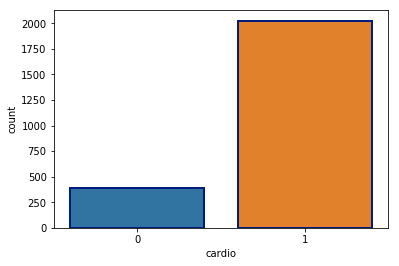

In [74]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

* I am not a doctor but with the little help of google I've learned some information about blood pressure,
* "If one’s systolic pressure (*ap_hi*) exceeds *180* or diastolic pressure (*ap_lo*) crosses *120*, it is a stage that requires immediate medical attention."


[![blood.jpg](https://i.postimg.cc/bwzm4sq5/blood.jpg)](https://postimg.cc/2VKdZjbd)

* A study published by doctors in NCBI NLM recorded a maximum blood pressure of 370/360 mm Hg. This study was performed by recording blood pressure in 10 male athletes through radial artery catheterization.
* Thus we can drop the ap_hi outlier values over 250 and ap_lo outlier values over 200, without fear of missing data.

In [75]:
out_filter = ((x["ap_hi"]>250) | (x["ap_lo"]>200) )
print("There is {} outlier".format(x[out_filter]["cardio"].count()))


There is 993 outlier


In [76]:
x = x[~out_filter]


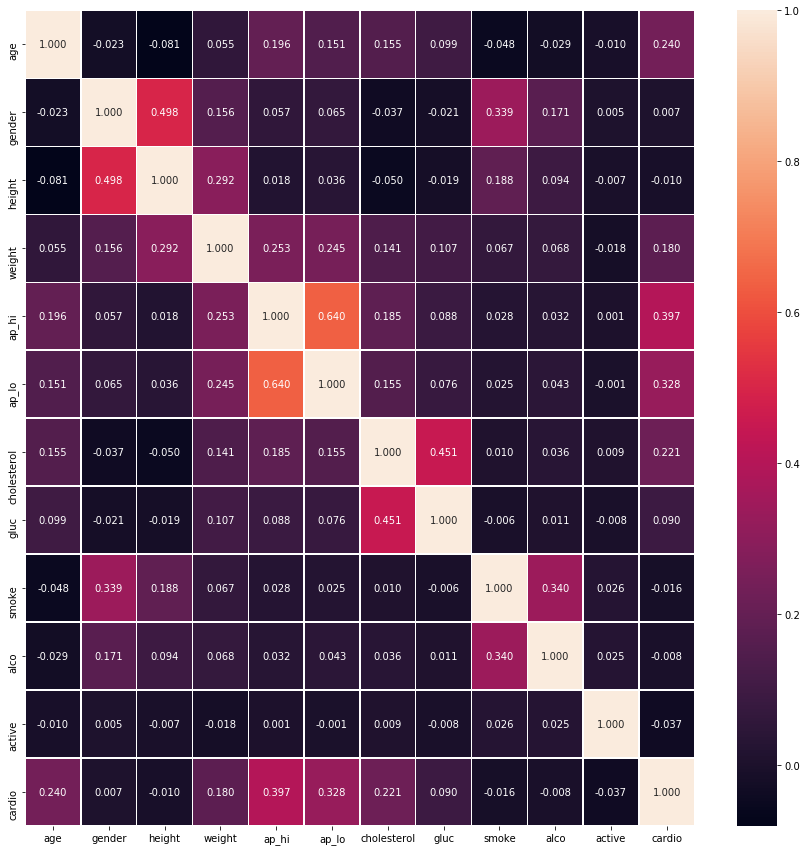

In [77]:
corr = x.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

* We can see from correlation map easily; cholesterol, blood pressure (ap_hi and ap_low both) and age have a powerful relationship with cardiovascular diseases.
* Glucogen and cholesterol have a strong relationship among them either.

### **Feature Engineering** <a id="7"></a>
<mark>[Return Contents](#0)

<hr>
### Body Mass Index Feature 
  
Height and weight seems uncorrelated with the cardio feature but Body Mass Index could be helpful to train our model.

In [78]:
def bmi_calc(w, h):
    return w/(h**2)

In [79]:
x["bmi"] = x["weight"]/ (x["height"]/100)**2

In [80]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


* Detecting genders of patients

In [81]:
a = x[x["gender"]==1]["height"].mean()
b = x[x["gender"]==2]["height"].mean()
if a > b:
    gender = "male"
    gender2 = "female"
else:
    gender = "female"
    gender2 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender2)

Gender:1 is female & Gender:2 is male


* Women have many of the same risk factors with men for heart disease as men, such as smoking, high blood pressure, and high cholesterol especially after 65.
* Thus we shouldn't categorize them into 1 and 2 because of 2 is always numerically bigger than 1, the model would take into account that and give a bigger ratio to men for having a disease
* We did not change other categorical code to one hot encoding because they express really hierarchical size
* An example from describtion of dataset : Cholesterol | 1: normal, 2: above normal, 3: well above normal


In [82]:
x["gender"] = x["gender"] % 2

(array([0, 1]), <a list of 2 Text xticklabel objects>)

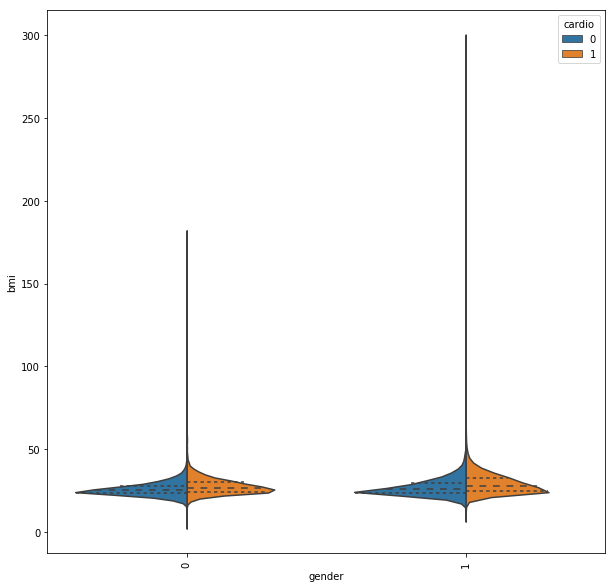

In [83]:
from sklearn.preprocessing import StandardScaler
x_std = standartization(x)

data = pd.melt(x_std,id_vars="cardio",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="gender", y="bmi", hue="cardio", data=x,split=True, inner="quart")
plt.xticks(rotation=90)

If we interpret the violin plot, the median and quartiles of bmi distribution of patients is slightly higher than non-patients.

### **Model Selection** <a id="8"></a>
<mark>[Return Contents](#0)
<hr>
### Preparing the Training and Test Sets <a id="9"></a>

Detecting outlier and handling them can increase our accuracy score.

To create a model first of all we will split our data to training and test set

In [84]:
y = x["cardio"]
y.shape

(68983,)

In [85]:
x.drop("cardio", axis=1,inplace=True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,18393,0,168,62.0,110,80,1,1,0,0,1,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,17623,0,169,82.0,150,100,1,1,0,0,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,23.011177


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


### Data Normalization <a id="10"></a>
<mark>[Return Contents](#0)
<hr>

In [87]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

### Model Comparison <a id="11"></a>
<mark>[Return Contents](#0)
<hr>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
Ada = AdaBoostClassifier()
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()
XGB = XGBClassifier()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive,
          "XGBoost" : XGB,
          "AdaBoost" : Ada}
scores= { }

for key, value in models.items():    
    model = value
    model.fit( x_train, y_train)
    scores[key] = model.score(x_test, y_test)
  


NameError: name 'x_train' is not defined

In [ ]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45) # Rotation of Country names...

* It seems that KNN and Random Forest algorithms are far ahead of the others.
* So let's focus on these algorithms
 
### K Fold Cross Validation <a id="12"></a>
<mark>[Return Contents](#0)
<hr>
    
* With K-Fold cross-validation, we obtain "K" pieces of results from different mini-training sets from our main training set.
* Then we choose the average of these results as the actual result.
* After all, by taking the standard deviation of K result, we can examine whether the data is consistent.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=x_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)

In [ ]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

The standard deviation value shows that we achieve consistent results.

### Grid Search <a id="13"></a>
<mark>[Return Contents](#0)
<hr>
 Let us use grid search algorithm, in order to find the best Random Forest Algorithm's "n_estimators" hyperparameter value for our model, l

In [ ]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(10,150,10)}

ran_cv = GridSearchCV(ran, grid, cv=3) # GridSearchCV
ran_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 
print("Best score: {}".format(ran_cv.best_score_))

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} # (60,62,64 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))

* This is the best of our results we obtained
* Let us evaluate our best model

### Model Evaluation <a id="14"></a>
<mark>[Return Contents](#0)
<hr>
### Test Set Accuracy Score <a id="15"></a>    

* Now we have selected our model with better hyper parameters than default ones.
* It is time to evaluate model with our test set

In [ ]:
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))

The ultimate success of our model in predicting the test set that has not been used in training is 0.72

### Confusion Matrix<a id="16"></a>
<mark>[Return Contents](#0)
<hr>


In [ ]:
y_true = y_test
y_pred = logreg_best.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)


In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

### F1 Score <a id="17"></a>
<mark>[Return Contents](#0)
<hr>

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
pd.DataFrame([[Precision, Recall, F1_Score]],columns=["Precision", "Recall", "F1 Score"], index=["Results"])

1. High precision relates to the low false positive rate
1. High recall relates to the low false negative rate

## ANN Aproach <a id="18"></a>
<mark>[Return Contents](#0)
<hr>

In [ ]:
x.shape

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, input_dim=12, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = RMSprop(learning_rate=0.002)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='val_loss',    # Quantity to be monitored.
    factor=0.1,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=50,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.00001     # lower bound on the learning rate.
    )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train.values,
                    batch_size=1024, epochs=1500,
                    verbose=0,validation_data=(x_test,y_test.values),
                    callbacks=[learning_rate_reduction, es],
                    shuffle=True)

model.evaluate(x_test, y_test.values, verbose=2)



In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Conclusion <a id="26"></a>
<mark>[Return Contents](#0)
<hr>
* If you like this, thank your for you upvotes.
* If you have any comments or questions, I would be happy to hear them.

[![smile.jpg](https://i.postimg.cc/0jVh4z64/smile.jpg)](https://postimg.cc/fS0HtTf7)